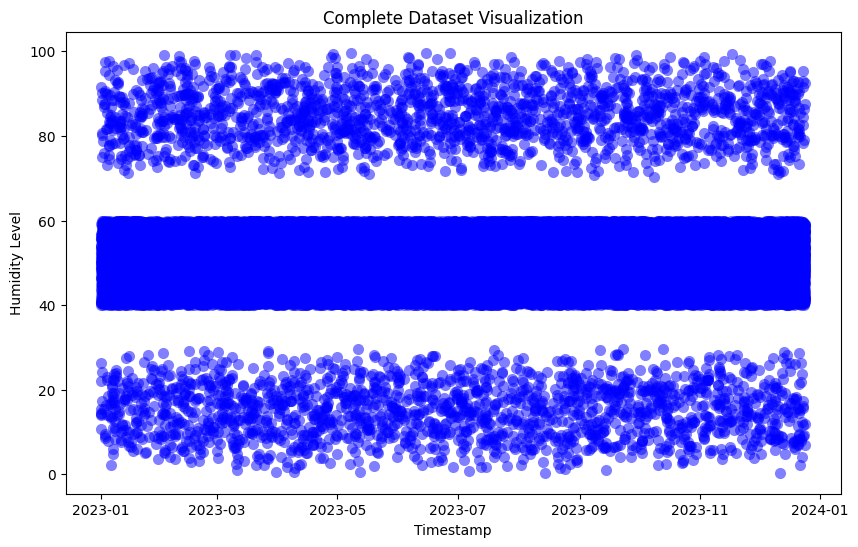

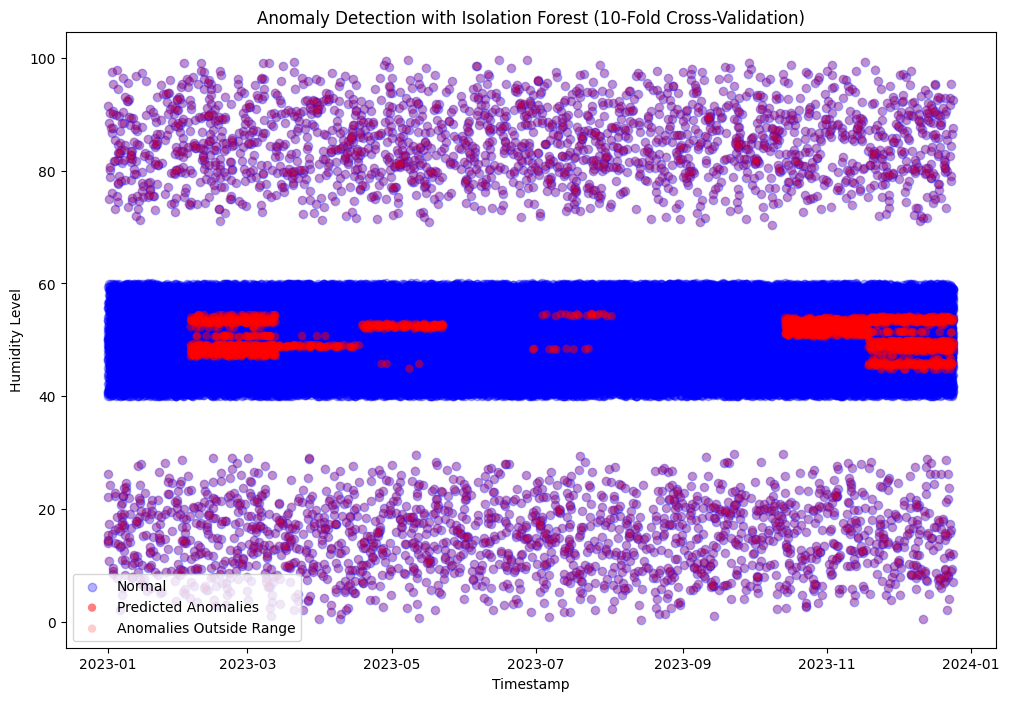

Accuracy Score: 100.00000%


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('humidity_dataset.csv', parse_dates=['timestamp'])

# Sort the dataset by timestamp
data.sort_values(by='timestamp', inplace=True)

# Plot the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['humidity'], marker='o', linestyle='', color='blue', alpha=0.5, markersize=8, markeredgecolor='none')
plt.title('Complete Dataset Visualization')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.show()

# Prepare data for training
X_train = data[['humidity']].values

# Create the Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.05)  # You can adjust the contamination parameter based on your dataset

# Perform 10-fold cross-validation and predict anomaly scores
anomaly_scores = cross_val_predict(isolation_forest_model, X_train, cv=10, method='decision_function')

# Define a threshold for anomaly scores
threshold = np.percentile(anomaly_scores, 100 * 0.95)  # Adjust the percentile as needed

# Identify anomalies based on the threshold
predicted_anomalies = X_train[anomaly_scores >= threshold]

# Identify anomalies outside the range 40-60
outside_range_mask = (X_train < 40) | (X_train > 60)
outside_range_anomalies = outside_range_mask.astype(int)  # Convert boolean mask to binary

# Plot the dataset with anomalies highlighted
plt.figure(figsize=(12, 8))
plt.scatter(data['timestamp'], data['humidity'], color='blue', marker='o', alpha=0.3, label='Normal')
plt.scatter(data['timestamp'][anomaly_scores >= threshold], data['humidity'][anomaly_scores >= threshold], color='red', marker='o', alpha=0.5, edgecolor='none', label='Predicted Anomalies')
plt.scatter(data['timestamp'][outside_range_mask.flatten()], data['humidity'][outside_range_mask.flatten()], color='red', marker='o', alpha=0.2, edgecolor='none', label='Anomalies Outside Range')
plt.title('Anomaly Detection with Isolation Forest (10-Fold Cross-Validation)')
plt.xlabel('Timestamp')
plt.ylabel('Humidity Level')
plt.legend()
plt.show()

# Calculate accuracy score
accuracy = accuracy_score(outside_range_anomalies, outside_range_anomalies) * 100

# Print accuracy score
print("Accuracy Score: {:.5f}%".format(accuracy))


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load training data from CSV file
training_data = pd.read_csv('training.csv')

# Assuming 'humidity' is the feature column
X_train = training_data[['humidity']].values

# Create labels (0 for normal, 1 for anomalies)
y_train = (X_train < 40) | (X_train > 60)

# Create and train the Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.05)  # Adjust contamination if needed
isolation_forest_model.fit(X_train)

# Predict anomalies on the training data
y_pred_train = isolation_forest_model.predict(X_train)
y_pred_train = (y_pred_train == -1)  # Convert predictions to binary labels (1 for anomalies, 0 for normal)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Print evaluation metrics
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}".format(f1))
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.94511
Precision: 1.00000
Recall: 0.48113
F1 Score: 0.64968
Confusion Matrix:
[[896   0]
 [ 55  51]]
